## Part A - Build a baseline model (5 marks)
Use the Keras library to build a neural network with the following:

- One hidden layer of 10 nodes, and a ReLU activation function

- Use the adam optimizer and the mean squared error as the loss function.

1. Randomly split the data into a training and test sets by holding 30% of the data for testing. You can use the train_test_split helper function from Scikit-learn.

2. Train the model on the training data using 50 epochs.

3. Evaluate the model on the test data and compute the mean squared error between the predicted concrete strength and the actual concrete strength. You can use the mean_squared_error function from Scikit-learn.

4. Repeat steps 1 - 3, 50 times, i.e., create a list of 50 mean squared errors.

5. Report the mean and the standard deviation of the mean squared errors.

In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D

In [6]:
import pandas as pd

# get data
! wget https://cocl.us/concrete_data
    
# load data
df = pd.read_csv('./concrete_data')
df.head()

--2020-02-15 19:38:01--  https://cocl.us/concrete_data
Resolving cocl.us (cocl.us)... 158.85.108.86, 169.48.113.194, 158.85.108.83
Connecting to cocl.us (cocl.us)|158.85.108.86|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv [following]
--2020-02-15 19:38:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0101EN/labs/data/concrete_data.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58988 (58K) [text/csv]
Saving to: ‘concrete_data’

concrete_data       100%[===================>]  57.61K  --.-KB/s    in 0.01s   

2020-02-15 19:38:02 (5.2

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [13]:
# get all predictor columns
x_cols = df.columns.tolist()[:-2]
print(x_cols)

# set target column
y_col = 'Strength'
print(y_col)

['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate']
Strength


In [27]:
# define baseline model:
def baseline_model():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(len(x_cols),)))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [37]:
# split data based on sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# create a empty list for saving mean squared error
mse_list = []

# create a loop that runs model on different training subsets 50 times
for i in range(50):
    
    # randomly split data by hodling 30%
    X_train, X_test, y_train, y_test = train_test_split(df[x_cols], df[y_col], train_size=0.7, random_state=2020)
    
    # train the model
    baseline = baseline_model().fit(X_train, y_train, epochs=50, verbose=0)
    
    # run the model on test set
    y_predict = baseline.model.predict(X_test)
    
    # calculate mean_squared_error and append to the list
    mse_list.append(mean_squared_error(y_true=y_test, y_pred=y_predict))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/model_selection/_split.py:217

The mean of MSE is : 413.0374606447627

The standard deviation of MSE is : 383.27311673708095


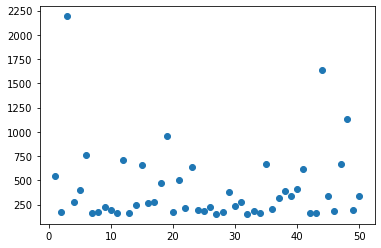

In [38]:
# plot mse
import matplotlib.pyplot as plt
%matplotlib inline
# calculate the std and mean
import numpy as np
mse_array = np.array(mse_list)

print(f'The mean of MSE is : {np.mean(mse_array)}')
print(f'\nThe standard deviation of MSE is : {np.std(mse_array)}')

# plot the mse
plt.scatter(x=list(range(1,51,1)), y=mse_list)
plt.show()